# Linear models
Author: Fadoua Ghourabi (fadouaghourabi@gmail.com)

Date: June 4, 2019

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

## Preliminaries

### Terms and notations

Before we start, let's agree on some terms and notations.

**Dataset** and **data** are both used interchangeably.

A data has **features**, denoted $X$, and a **target**, denoted $y$. The values of $n$ features are denoted $x_i, \ldots, x_n$. A data has $m > 0$ observations and the observation $j$ is denoted $x^j = [x_i^j, \ldots, x_n^j]$ and $y^j$. The predicted target values are denoted $\hat{y}$ and the mean of the target values is denoted $\overline{y}$.

### Datasets

We use the following public datasets:

- sklearn.datasets: scikit-learn comes with a few small toy datasets that do not require to download any file from  external website.
    - load_boston() : boston house prices dataset
    - load_iris(): Iris plants dataset
    - load_diabetes(): diabetes dataset
    - load_digits(): Optical recognition of handwritten digits dataset
    - load_linnerud(): 
    - load_winse(): Wine recognition dataset
    - load_breast(): Breast cancer diagnosis dataset

- Real-world datasets downloaded from online databases. 
    - University of Standford datasets, e.g. http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv for advertising budget and sales
    - openml.org
    - others...

## Linear regression

### Basic concept

Linear regression (or ordinary least squares) is the simplest model. The objective of a linear regression model is to find a relationship between one or more features and a **continuous** target variable. When there is only one feature it is called Univariate Linear Regression. If there are multiple features, it is called Multiple Linear Regression.

<img src="linearRegression.png" hight=300 width=400>

Let $x_1$, $\cdots$, $x_n$ be $n$ features and $y$ be the target. Linear regression model finds parameters $b$, $w_1$, $\cdots$, $w_n$ such that:

1. $\hat{y} = \sum^{n}_{i = 1} w_i x_i + b$, where $\hat{y}$ is the predicted value, and
2. the cost function $J(w,b)$ is minimum. 

The cost function is commonly used to assess the performance of a model. In the case of the linear regression model, the cost function is the **mean square error**: $$\text{MSE} = J(w,b) = \frac{1}{2m}\sum^{m}_{i = 1}(y^i - \hat{y}^{~~i})^2$$, where $m$ is the number of observations.

Now, let's code linear regression model from scratch! To that end, use data vectorization that we covered in numpy session.

**Practice.** 
1. What vectors/matrices do we need? What are their shapes?
2. Function ``linear_fct`` implements the vectorization $\sum^{n}_{i = 1} w_i x_i + b$. Complete the code.

In [ ]:
def linear_fct(X, W, b):
    ### START CODE HERE ### (1 line of code)
    y_hat = 
    ### END CODE HERE ###
    
    return y_hat

3. Function ``MSE`` computes the cost function. Complete the code.

In [ ]:
def MSE(y,y_hat):
    m = X.shape[0]
    
    ### START CODE HERE ### (1 line of code)
    mse = 
    ### END CODE HERE ###
    
    return mse

In [ ]:
W, b, X = np.array([[1.],[2.],[1.]]), 2., np.array([[1.,2.,1.],[3.,4.,3.2]])
y = np.array([[6.9],[13.8]])

In [ ]:
y_hat = linear_fct(X, W, b)
y_hat

In [ ]:
MSE(y, y_hat)

### Gradient descent

Remember that linear regression finds parameters $b$, $w_1$, $\cdots$, $w_n$ that minimize the cost function $J(w,b)$. We will use Gradient Descent to find the optimal values of the parameters.

<img src="GD1.png" hight=300 width=400>
<img src="GD2.png" hight=300 width=400>

We measure how the cost function changes when the parameters change. Therefore, we compute the partial derivatives of the cost function w.r.t to the parameters. $\frac{\delta{J}}{\delta{b}}$ and $\frac{\delta{J}}{\delta{w_i}}$, where $1\leq i \leq n$. 

**Practice.** 
1. Prove that $db = \frac{\delta{J}}{\delta{b}} = \frac{1}{m}\sum^{m}_{j=1}(\hat{y}^{~~j} - y^j)$ and $dw_i = \frac{\delta{J}}{\delta{w_i}} = \frac{1}{m}\sum^{m}_{j=1}(\hat{y}^{~~j} - y^j)x_{i}^j$.

2. Complete function ``derivatibe`` that computes $db$ and $dw$.

In [ ]:
def derivative(X, y, y_hat):
    m = X.shape[0]
    
    ### START CODE HERE ### (2 lines of code)
    db =
    dw = 
    ### END CODE HERE ### 
    
    return db, dw

In [ ]:
W, b, X = np.array([[1.],[2.],[1.]]), 2., np.array([[1.,2.,1.],[3.,4.,3.2]])
y = np.array([[6.9],[13.8]])
y_hat = linear_fct(X, W, b)

In [ ]:
y_hat

In [ ]:
derivative(X, y, y_hat)

In [ ]:
MSE(y, y_hat)

### Fitting

Fitting means computing parameters W and b that make the MSE minimum. When the function $J$ is concave, which is the case of the parabolic MSE function, we update the parameters towards to the global minumum of $J$. To that end, we update W and b as follows:

$w_i = w_i - \alpha \frac{\delta{J}}{\delta{w_i}}$, and

$b = b - \alpha \frac{\delta{J}}{\delta{b}}$

$\alpha$ is called the **learning rate**. W and b are updated recursively until the cost function converges to the minimum value. If the value of $\alpha$ is too small, the cost function takes larger time to converge. If $\alpha$ is too large, gradient descent may skip the minimum and fail to converge. $\alpha$ is also called a **hyperparameter** of the regression model. Tuning hyperparameters is crucial when applying a machine learning model because it affects its performance.

**Practice.** Function ``LR`` performs fitting. 
1. Complete the code of ``LR``.
2. What is the role of parameter **tolerance**? **max_iterations**?

In [ ]:
def LR(X, y, alpha=0.01, tolerance=1.0e-5, max_iterations=1000000, desc=False):
    
    m = X.shape[0] # number of observations
    n = X.shape[1] # number of features (independant variables)

    # initialization of W and b
    W = np.random.randn(n,1) # W is a (n,1) matrix of random numbers
    b = 0 # b = 0
    
    mse_prev = 0 # initial value
    i = 0 # number of iterations
    while True:
        i = i + 1
        if (i > max_iterations):
            print("\033[31m Possible divergence of gradient descent.\n Computation reached max iteration........will abort!")
            break
            
        ### START CODE HERE ### (2 lines of code)
        # step 1. compute the predicted values
        y_hat =
        # step 2. compute the cost function
        mse = 
        ### END CODE HERE ### 
        
        if (abs(mse - mse_prev) < tolerance):
            break
            
        # step 3. update the values of W and b 
        ### START CODE HERE ### (3 lines of code)
        db, dw =
        W =
        b =
        ### END CODE HERE ### 
        
        if (i % 100 == 0) & desc:
            print("A iteration {0}, the cost function is {1}.".format(i, mse))
            
        mse_prev = mse
        
    if desc:   
        print("The total number of iterations is {0}".format(i-1))  
        print("Parameter W: {0}".format(W))
        print("Parameter b: {0}".format(b))
        print("Cost function: {0}".format(mse))
        
    return b, W, mse, i-1

In [ ]:
b, W, mse, i = LR(X, y, desc=True)

Now that we computed optimal values for b and W, we can perform predictions.

In [ ]:
def predict(X, W, b):
    y_hat = np.dot(X,W) + b
    
    return y_hat

In [ ]:
predict(X, W, b)

In [ ]:
y

In [ ]:
m, n = 110, 10
X_new = np.random.randn(m,n)
y_new = np.random.randn(m,1)
W_new = np.random.randn(n,1)
b_new = 1

In [ ]:
plt.scatter(X_new[:,0], y_new)

In [ ]:
W_new, b_new, mse, i = LR(X_new,y_new, desc=True) ## how many iterations you get?

We test the impact of $\alpha$ on the accuracy of the model.

In [ ]:
def test_alpha(X, y, alphas):
    scores = []
    for alpha in alphas:
         b, W, mse, i = LR(X, y)
         scores.append((alpha,mse,i))
    return scores

In [ ]:
alphas = [5,1,0.1,0.001,0.0001]
test_alpha(X_new, y_new, alphas)

### Application

Let's test our model on real-world data set.

In [ ]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
x0 = data.TV
y0 = data.sales

x1 = data.radio
y1 = data.sales

x2 = data.newspaper
y2 = data.newspaper

plt.figure()
plt.subplot(131)
plt.scatter(x0, y0, c='b', marker='o')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(132)
plt.scatter(x1, y1, c='b', marker='o')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(133)
plt.scatter(x2, y2, c='b', marker='o')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

In [ ]:
X = data['newspaper'] #,'radio','newspaper']]

In [ ]:
y = data.sales

In [ ]:
y.shape

To be able to use the model we implemented above, we first must:
1. convert the data to numpy arrays. This is a drawback of our model.
2. make sure that the data has a valid shape. Recall: if n and m are the # of features and observations, respectively, then X is of shape (m, n), y and y_hat of shape (m, 1), W of shape (m, 1) and b a scalar.

In [ ]:
def convert_and_reshape(M):
    
    sM = M.shape
    
    if not isinstance(M, np.ndarray):
        M = M.values
    
    if len(sM) == 1:
        M = M.reshape((sM[0],1))
    else:
        M = M.reshape(sM)
        
    return M

In [ ]:
X = convert_and_reshape(X)
y = convert_and_reshape(y)

In [ ]:
LR(X,y,alpha=0.001,desc=True)

In [ ]:
X = data[['TV','radio','newspaper']]

In [ ]:
X = convert_and_reshape(X)

In [ ]:
LR(X,y,alpha=0.0001,desc=True)

As you can see, the model diverges when using three features... How can we revise the model?

### Linear regression with scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = data[["TV","radio","newspaper"]]
y = data.sales

We call ``train_test_split`` to split the data to train dataset and test dataset. Note that ``train_test_split`` works with DataFrame object. 

Other parameters:
- ``stratify`` can be used when the target is a class. It means each target class should be represented with equal proportions. In our example, the two outcome classes, i.e. 0 and 1, have the same propositions in ``y_train`` and ``y_test``.
- ``random_state=0`` makes sure that we obtain the same datasets everytime we run ``train_test_split``.
- by default, the size of ``X_train`` and ``X_test`` are 75% and 25%, respectively. Use parameter ``test_size=0.33`` when working with ``X_test`` with size 33%, for instance.

Result:
- ``train_test_split`` returns two DataFrames ``X_train`` and ``X_test``, and two Series ``y_train`` and ``y_test``.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
y.shape

We fit the model to the training datasets by calling ``LinearRegression().fit(X_train, y_train)``. We use the dataset ``X_test`` to predict the target values ``y_pred``.

In [ ]:
LR = LinearRegression(verbose = 1)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

The parameters W and b are stored in the attributes ``coef_`` and ``intercept_``. The ``coef_`` attribute is a numpay array [$w_1$, $w_2$, $\ldots$, $w_n$], where $w_i$ is the weight of feature $x_i$. The ``intercept_`` attribute is always a float number.

In [ ]:
print("The weights or coefs of the features are ", LR.coef_)
print("The bias of the model is ", LR.intercept_)

In [ ]:
LR.get_params()

Note that ``LinearRegression()`` doesn't have a hyperparemeter $\alpha$. It uses different algorithm to obtain the optimal values of the parameters. 

**Homework.** Search for other approaches used to compute optimal parmeters?


``SGDRegressor()`` uses gradient descent.

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
SGD = SGDRegressor(learning_rate="optimal")
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)

In [ ]:
print("The weights or coefs of the features are ", LR.coef_)
print("The bias of the model is ", LR.intercept_)

#### Evaluation 

We compute the cost function to evaluate the performance of the model.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

We can measure how well the model works by computing the accuracy, which is the fraction of sales that were correctly predicted. The accuracy is coefficient $$R^2 = 1 - \frac{\sum^{m}_{i=1}(y^i - \hat{y}^i)^2}{\sum^{m}_{i=1}(y^i - \overline{y^i})^2}$$, where for an observation $i$, $y^i$ is the true values, $\hat{y}^i$ is the predicted values and $\overline{y}$ is the mean of all $y^i$. The close the score is to 1.0 the better.

In [ ]:
LR.score(X_train,y_train)

In [ ]:
LR.score(X_test,y_test)

#### Cross validation

In cross validation, the data is split repeateadly and multiple data are trained. K-fold cross-validation is a common method, where 3 $\leq$ K is a number specified by the user.

<img src = "crossvalidation.png" height="200" width="300">

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate

In [ ]:
k_fold = KFold(n_splits=5)

In [ ]:
k_fold.split(X)

In [ ]:
for train_indices, test_indices in k_fold.split(X):      
    print('Train: %s | test: %s' % (train_indices, test_indices))

The function ``cross_val_score`` returns the score of each test set in the k-fold cross validation.

In [ ]:
cross_val_score(LR, X, y, cv=k_fold)

The function ``cross_val_predict`` has a similar interface to cross_val_score, but returns, **for each element in the input, the prediction that was obtained for that element when it was in the test set**. 

In [ ]:
predictions = cross_val_predict(LR, X, y, cv=k_fold)

In [ ]:
plt.scatter(y, predictions)
plt.xlabel("y")
plt.ylabel("predictions")

**Question.** What is the benifit of k-fold cross-validation? 

### Overfitting vs. underfitting

Overfitting occurs when a model is fit too closely to the training set. The model works well on the training set but not able to generalize to new data. In such case, the training score is high but the test score is low.

Underfitting occurs when a model is too simple, e.g. "Anyone who owns a house travels abroad.". The model performs badly on both training dataset and test dataset.

**Question.** Which of the follwoing models is overfitted? Underfitted?

<img src="over_under.png">

As we mentioned above, the score is a useful metric to decide whether a model is overfitted or underfitted. Other metrics are bias and variance.  The bias of a model is its average error for different training sets. The variance of a model indicates how sensitive it is to varying training sets. An overfitting model tends to have a high variance and a low bias. An underfitting model tends to have a high bias and a low variance.

scikit-learn library recommends the following measures:

**Case of high bias**
- Add more features. 
- Use a more sophisticated model. 
- Use fewer samples. A high-bias algorithm can attain nearly the same error with a smaller training sample. For algorithms which are computationally expensive, reducing the training sample size can lead to very large improvements in speed.
- Decrease regularization. Regularization is a technique used to impose simplicity in some machine learning models, by adding a penalty term that depends on the characteristics of the parameters. If a model has high bias, decreasing the effect of regularization can lead to better results.

**Case of high variance**
- Use fewer features. 
- Use more training samples. Adding training samples can reduce the effect of overfitting, and lead to improvements in a high variance estimator.
- Increase Regularization. Regularization is designed to prevent overfitting. In a high-variance model, increasing regularization can lead to better results.

### Ridge regression

In ridge regression the coefficients $w_i$ are chosen to be as small as possible, i.e. with magnitudes close to 0. The cost function is defined as follows:

$$J(w,b) = \frac{1}{2m}\sum^{m}_{i = 1}(y^i - \hat{y}^i)^2 + \alpha \sum^{n}_{i=1}(w_i)^2$$

Ridge regression puts constraint on the coefficients, namely $\alpha \sum^{n}_{i=1}(w_i)^2 < c$ for some $c > 0$. The penalty term, $\alpha$, regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity. Ridge regression uses **L2 regularization**. Obviously, when $\alpha$ $\to$ 0 , the cost function becomes similar to the linear regression cost function. So the lower the constraint (low $\alpha$) on the features the closer the model to linear regression.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred)

In [ ]:
mse_ridge - mse # mse is the cost function of linear regression

In [ ]:
ridge.score(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)

#### Coefficients with magnitude close to 0

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
boston

In [ ]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['Price'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

ridge05 = Ridge(alpha = 0.5)
ridge05.fit(X_train, y_train)

ridge1 = Ridge(alpha = 1)
ridge1.fit(X_train, y_train)

ridge10 = Ridge(alpha = 10)
ridge10.fit(X_train, y_train)

ridge100 = Ridge(alpha = 100)
ridge100.fit(X_train, y_train)

coef_index = [[1,2,3,4,5,6,7,8,9,10,11,12,13]]

plt.subplot(321)
plt.plot(coef_index,LR.coef_, 'r*',linestyle='none')
plt.title(r'Linear Regression ($\alpha = 0$)')

plt.subplot(322)
plt.plot(coef_index,ridge05.coef_, 'b^',linestyle='none')
plt.title(r'$\alpha = 0.5$')

plt.subplot(323)
plt.plot(coef_index,ridge1.coef_, 'mo',linestyle='none')
plt.title(r'$\alpha = 1$')

plt.subplot(324)
plt.plot(coef_index,ridge10.coef_, 'gs',linestyle='none')
plt.title(r'$\alpha = 10$')

plt.subplot(325)
plt.plot(coef_index,ridge100.coef_, 'yd',linestyle='none')
plt.title(r'$\alpha = 100$')

plt.subplots_adjust(hspace=0.5, wspace=0.5)



#plt.xlabel("Coefficient")
#plt.ylabel("Magnitude")

**Question.** Discuss the above graphs.

#### Ridge regression vs. linear regression

In [ ]:
print("Training set score (alpha = 0): ", LR.score(X_train, y_train))
print("Test set score (alpha = 0): ", LR.score(X_test, y_test))

print("Training set score (alpha = 0.5): ", ridge05.score(X_train, y_train))
print("Test set score (alpha = 0.5): ", ridge05.score(X_test, y_test))

print("Training set score (alpha = 1): ", ridge1.score(X_train, y_train))
print("Test set score (alpha = 1): ", ridge1.score(X_test, y_test))

print("Training set score (alpha = 10): ", ridge10.score(X_train, y_train))
print("Test set score (alpha = 10): ", ridge10.score(X_test, y_test))

print("Training set score (alpha = 100): ", ridge100.score(X_train, y_train))
print("Test set score (alpha = 100): ", ridge100.score(X_test, y_test))

<div class="alert alert-info"><h4>Note from the book "The elements of statistical learning. T. Hastie et. al."</h4><p>For a small subset of data < 400, ridge regression performs better than linear regression. No difference when samples are large enough.</p></div>

In [ ]:
from sklearn.model_selection import learning_curve, KFold

def plot_scores(estimator, X, y, name):
    training_set_size, train_scores, test_scores = learning_curve(estimator,X, y, train_sizes=np.linspace(.1, 1, 20), random_state=0, cv=KFold(n_splits=5)) 
    plt.plot(training_set_size,train_scores.mean(axis=1), "r-",label="training " + name)
    plt.plot(training_set_size,test_scores.mean(axis=1), "r--",label="test " + name)
    training_set_size, train_scores, test_scores = learning_curve(LinearRegression(),X, y, train_sizes=np.linspace(.1, 1, 20), random_state=0, cv=KFold(n_splits=5)) 
    plt.plot(training_set_size,train_scores.mean(axis=1), "k-",label="training LR")
    plt.plot(training_set_size,test_scores.mean(axis=1), "k--",label="test LR")
    plt.legend(loc=(1.5, 0), ncol=2, fontsize=11)
    plt.ylim(0,1)
    
plt.subplot(311)    
plot_scores(Ridge(alpha = 1), X, y, "Ridge(alpha = 1)")
plt.subplot(312)    
plot_scores(Ridge(alpha = 10), X, y, "Ridge(alpha = 10)")
plt.subplot(313)    
plot_scores(Ridge(alpha = 300), X, y, "Ridge(alpha = 300)")
plt.subplots_adjust(wspace=3)



Conclusion:
- The training score is higher than the test score for ridge regression and linear regression.
- The training score of ridge redgression is lower or equal than the one for linear regression. This is due to **regularization** or restricting the model to avoid overfitting.
- The test score of ridge is better, in particular for small datasets < 400.

### Lasso 

Similar to ridge regression, lasso performs regularization. Lasso not only constraints the coefficient to be close to zero but also reduces some coefficients to zero. Features with coefficient equal to zero are therefore entirely ignored by the model. This can be useful for feature selection. The regularization used by lasso is called **L1 regularization**.

The cost function of lasso is as follows:
$$J(w,b) = \frac{1}{2m}\sum^{m}_{i = 1}(y^i - \hat{y}^i)^2 + \alpha \sum^{n}_{i=1}|w_i|$$

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [ ]:
plt.plot(lasso.coef_, 'r*',linestyle='none')
plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'--',lw=0.5)
plt.title('Lasso')

In [ ]:
boston.feature_names

In [ ]:
print(boston.DESCR.format())

Lasso is good at identifying useless features, such as festures with constant or almost constant values.

In [ ]:
X_train['foo'] = 12.4

In [ ]:
X_test['foo'] = 12.4

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [ ]:
plt.plot(lasso.coef_, 'r*',linestyle='none')
plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0],'--',lw=0.5)
plt.title('Lasso')

In [ ]:
lasso.coef_

Almost constant...

In [ ]:
X_train['foo'][:50] = 12.4
X_train['foo'][50:200] = 9.06
X_train['foo'][200:] = 10
X_test['foo'][:14] = 10
X_test['foo'][14:] = 12.4

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
plt.plot(lasso.coef_, 'r*',linestyle='none')
plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0,0],'--',lw=0.5)
plt.title('Lasso')

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
lasso.score(X_test, y_test)

Similar to ridge regression, Lasso has a hypperparameter $\alpha$ that controls the regularization. The default value of $\alpha$ is 1.

In [ ]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
lasso.score(X_test, y_test)

In [ ]:
lasso.coef_

### Logistic regression 

Binary logistic regression is a machine learning method used for prediction like any other regression analyses. Logistic regression is suitable for **classification problems** beacause it can be used to explain the relationship between features $x_1$, $\ldots$, $x_n$ and a **class** $y$. For instance, whether features $x_1$, $\ldots$, $x_n$ of a picture describe a cat or not. Estimation $\hat{y}$ is regarded as a probability of a class.

$$\hat{y} = f(\sum^{n}_{i = 1} w_i x_i + b),$$ where $f$ is called **activation function**.

**Example: Binary logistic regression**
<img src="LRegression.png" width=400 hight=300>

where $\sigma$ is the sigmoid function, i.e. $\sigma(z) = \frac{1}{1+e^{-z}}$ and $0 \leq \sigma(z)\leq 1$.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

In [ ]:
LogR = LogisticRegression(solver = 'newton-cg', multi_class='multinomial')
LogR.fit(X_train, y_train)
y_pred = LogR.predict(X_test)

In [ ]:
LogR.score(X_train, y_train)

In [ ]:
LogR.score(X_test, y_test)

### Polynomial regression

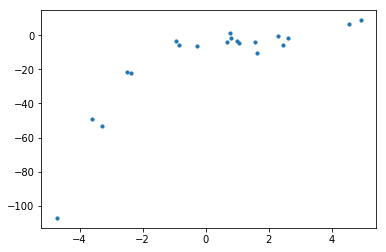

In [16]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)

In [17]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

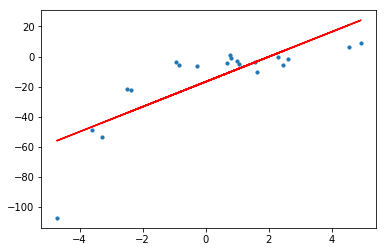

In [18]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')

In [20]:
model.score(x,y)

0.6386750054827147

In [22]:
mean_squared_error(y,y_pred)

253.07217948430372

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [27]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

In [28]:
mean_squared_error(y,y_poly_pred)

102.42325465734493

In [30]:
model.score(x_poly,y)

0.8537647164420812